In [4]:
from typing import List, Tuple
import findspark
import os
import random
import requests
import matplotlib.pyplot as plt
import numpy as np
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
from os.path import abspath
from datetime import datetime
from PIL import Image
from io import BytesIO
from collections import namedtuple

findspark.init(r"D:\spark\spark")

os.environ["SPARK_HOME"] = r"D:\spark\spark"
os.environ["HADOOP_HOME"] = r"D:\spark\spark\hadoop\bin"
os.environ["JAVA_HOME"] = r"D:\spark\jdk-21"

jarsql = r"C:\leads\venv\Lib\site-packages\pyspark\mssql-jdbc-9.4.0.jre11.jar"
warehouse_location = abspath('spark-warehouse')

conf = SparkConf()
conf.set("spark.master", "local[*]")
conf.set("spark.executor.memory", "4g")
conf.set("spark.driver.memory", "4g")
conf.set('spark.driver.extraClassPath', jarsql)
conf.set('spark.executor.extraClassPath', jarsql)

spark = SparkSession.builder\
    .config(conf=conf)\
    .config("spark.sql.warehouse.dir", warehouse_location)\
    .appName("Testing PySpark Example")\
    .getOrCreate()

sc = spark.sparkContext

In [5]:
Product = namedtuple("Product", ["cod_produto", "nome", "valor", "imagem", "estoque"])
OrderItem = namedtuple("OrderItem", ["nome", "cod_produto", "quantidade"])
Customer = namedtuple("Customer", ["codigo", "nome", "endereco"])
Shipping = namedtuple("Shipping", ["frete"])

def create_product(cod_produto: int, nome: str, valor: float, imagem: str, estoque: int) -> Product:
    return Product(cod_produto, nome, valor, imagem, estoque)

def create_order_item(nome: str, cod_produto: int, quantidade: int) -> OrderItem:
    return OrderItem(nome, cod_produto, quantidade)

def create_customer(codigo: int, nome: str, endereco: str) -> Customer:
    return Customer(codigo, nome, endereco)

def create_shipping(frete: float) -> Shipping:
    return Shipping(frete)

def simulate_shopping_rdd(products: List[Product], num_items: int) -> List[OrderItem]:
    cart = []
    for _ in range(num_items):
        product = random.choice(products)
        quantidade = random.randint(1, product.estoque)
        cart.append(create_order_item(product.nome, product.cod_produto, quantidade))
    return cart

In [6]:
products = [
    create_product(1, "Processador Intel Core i5-12400F, 2.5GHz (4.4GHz Max Turbo), Cache 18MB, LGA 1700 - BX8071512400F", 999.0
                   , "https://images.kabum.com.br/produtos/fotos/283718/processador-intel-core-i5-12400f-cache-xmb-xghz-xghz-max-turbo-lga-1700-bx8071512400f_1640094444_p.jpg", 10),
    create_product(2, "Monitor Gamer LG UltraGear 27 Full HD, 144Hz, 1ms, IPS, HDMI e DisplayPort, HDR 10, 99% sRGB, FreeSync Premium, VESA - 27GN65R", 1399.0,
                   "https://images.kabum.com.br/produtos/fotos/444038/monitor-gamer-lg-ultragear-27-full-hd-144hz-1ms-ips-hdmi-e-displayport-hdr-10-99-srgb-freesync-premium-vesa-27gn65r_1684763831_p.jpg", 15),
    create_product(3, "Headset Sem Fio Gamer HyperX Cloud Stinger Core Som Surround 7.1, Drivers 40mm - HHSS1C-BA-BK/G", 300.0, 
                   "https://images.kabum.com.br/produtos/fotos/114027/headset-sem-fio-gamer-hyperx-cloud-stinger-core-7-1-hhss1c-ba-bk-g_1597936019_p.jpg", 5),
    create_product(4, "Gabinete Gamer Rise Mode Glass 06X, Mid Tower, Lateral em Vidro Fumê e Frontal em Vidro Temperado, Preto - RM-CA-06X-FB", 200.0, 
                   "https://images.kabum.com.br/produtos/fotos/324516/gabinete-gamer-rise-mode-glass-06x-lateral-em-vidro-fume-e-frontal-em-vidro-temperado-preto-rm-ca-06x-fb_1660589149_p.jpg", 8),
    create_product(5, "Placa de Vídeo RX 6750 XT MECH 2X 12G V1 Radeon, 12GB GDDR6, FreeSync, Dual Fan", 2200.0, 
                   "https://images.kabum.com.br/produtos/fotos/475438/placa-de-video-rx-6750-xt-mech-2x-12g-v1-radeon-12gb-gddr6-freesync-dual-fan_1689965385_p.jpg", 12)
]

order = [
    create_order_item("Processador Intel Core i5-12400F, 2.5GHz (4.4GHz Max Turbo), Cache 18MB, LGA 1700 - BX8071512400F", 1, 1),
    create_order_item("Headset Sem Fio Gamer HyperX Cloud Stinger Core Som Surround 7.1, Drivers 40mm - HHSS1C-BA-BK/G", 3, 1),
    create_order_item("Placa de Vídeo RX 6750 XT MECH 2X 12G V1 Radeon, 12GB GDDR6, FreeSync, Dual Fan", 5, 1)
]

Detalhes do Pedido:
Data: 2023-10-30
Código do Cliente: 12345
Nome do Cliente: Guilherme Dataside
Endereço do Cliente: Centro Campinas, Campinas- SP
Frete: R$34.99
Prazo de Entrega: 2 dias
Produto 1: Processador Intel Core i5-12400F, 2.5GHz (4.4GHz Max Turbo), Cache 18MB, LGA 1700 - BX8071512400F - Preço: R$999.00 - Estoque: 10


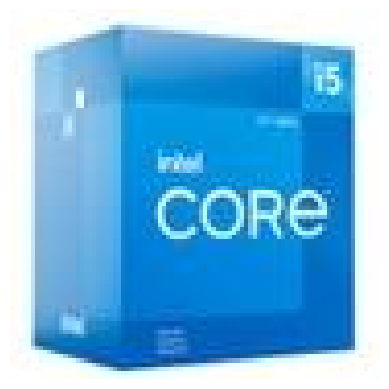

Produto 2: Monitor Gamer LG UltraGear 27 Full HD, 144Hz, 1ms, IPS, HDMI e DisplayPort, HDR 10, 99% sRGB, FreeSync Premium, VESA - 27GN65R - Preço: R$1399.00 - Estoque: 15


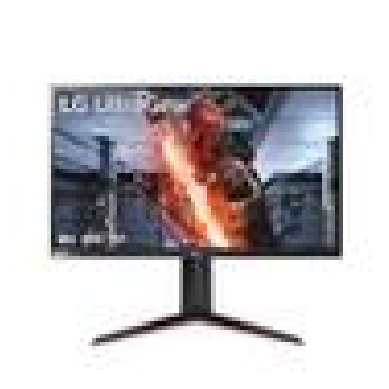

Produto 3: Headset Sem Fio Gamer HyperX Cloud Stinger Core Som Surround 7.1, Drivers 40mm - HHSS1C-BA-BK/G - Preço: R$300.00 - Estoque: 5


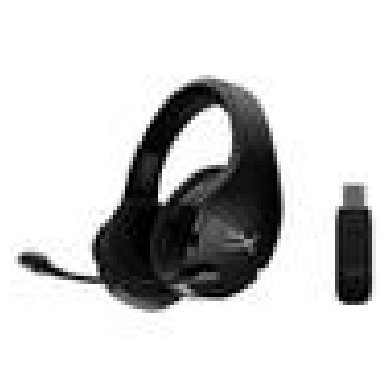

Produto 4: Gabinete Gamer Rise Mode Glass 06X, Mid Tower, Lateral em Vidro Fumê e Frontal em Vidro Temperado, Preto - RM-CA-06X-FB - Preço: R$200.00 - Estoque: 8


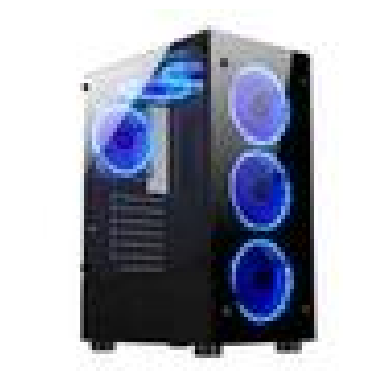

Produto 5: Placa de Vídeo RX 6750 XT MECH 2X 12G V1 Radeon, 12GB GDDR6, FreeSync, Dual Fan - Preço: R$2200.00 - Estoque: 12


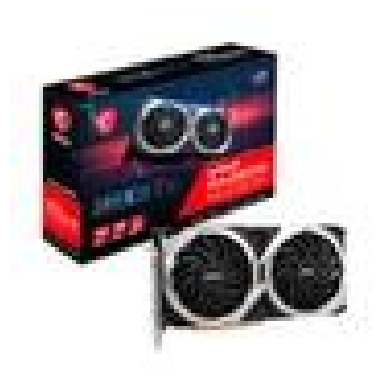


Carrinho de Compras:
Produto Processador Intel Core i5-12400F, 2.5GHz (4.4GHz Max Turbo), Cache 18MB, LGA 1700 - BX8071512400F - Código: 1 - Quantidade: 1
Produto Headset Sem Fio Gamer HyperX Cloud Stinger Core Som Surround 7.1, Drivers 40mm - HHSS1C-BA-BK/G - Código: 3 - Quantidade: 1
Produto Placa de Vídeo RX 6750 XT MECH 2X 12G V1 Radeon, 12GB GDDR6, FreeSync, Dual Fan - Código: 5 - Quantidade: 1

Total do Carrinho: R$3499.00
Frete: R$34.99
Total do Carrinho com Frete: R$3533.99
Número do Pedido: 7419


In [7]:


def calculate_cart_total_rdd(item: OrderItem, products: List[Product]) -> float:
    cod_produto, quantidade_pedido = item.cod_produto, item.quantidade
    product = next((p for p in products if p.cod_produto == cod_produto), None)
    if product:
        return product.valor * quantidade_pedido
    return 0.0

def update_stock_rdd(products: List[Product], cod_produto: int, quantidade: int) -> List[Product]:
    updated_products = list(products)
    for i, product in enumerate(updated_products):
        if product.cod_produto == cod_produto:
            updated_estoque = product.estoque + quantidade
            updated_products[i] = product._replace(estoque=updated_estoque)
    return updated_products

def add_to_cart_and_check_stock_rdd(cart: List[OrderItem], products: List[Product], order_item: OrderItem) -> Tuple[List[OrderItem], List[Product]]:
    product = next((p for p in products if p.cod_produto == order_item.cod_produto), None)
    if product:
        if product.estoque >= order_item.quantidade:
            cart.append(order_item)
            products = update_stock_rdd(products, order_item.cod_produto, -order_item.quantidade)
        else:
            print(f"Produto {order_item.nome} está esgotado. Estoques disponíveis: {product.estoque}")
    else:
        print(f"Produto {order_item.nome} não encontrado.")
    return cart, products

def calculate_shipping_rdd(cart: List[OrderItem], products: List[Product], shipping_percentage: float) -> float:
    shipping_cost = 0.0
    for item in cart:
        product = next((p for p in products if p.cod_produto == item.cod_produto), None)
        if product:
            shipping_cost += (item.quantidade * product.valor * shipping_percentage)
    return shipping_cost

def process_order_rdd(order_items: List[OrderItem], products: List[Product], customer: Customer, shipping: Shipping) -> Tuple[List[OrderItem], float, float, int]:
    cart_rdd = sc.parallelize(order_items)
    products_dict = {product.cod_produto: product for product in products}

    cart_rdd = cart_rdd.filter(lambda item: products_dict.get(item.cod_produto, None))
    
    cart_total = cart_rdd.map(lambda item: calculate_cart_total_rdd(item, products)).reduce(lambda a, b: a + b)
    
    shipping_percentage = 0.01 
    shipping_cost = calculate_shipping_rdd(order_items, products, shipping_percentage)

    order_number = random.randint(1000, 9999)
    
    current_date = datetime.now().strftime("%Y-%m-%d")

    print("Detalhes do Pedido:")
    print(f"Data: {current_date}")
    print(f"Código do Cliente: {customer.codigo}")
    print(f"Nome do Cliente: {customer.nome}")
    print(f"Endereço do Cliente: {customer.endereco}")
    print(f"Frete: R${shipping_cost:.2f}")

    cart_total_with_shipping = cart_total + shipping_cost

   
    delivery_time = random.randint(1, 5)

    print(f"Prazo de Entrega: {delivery_time} dias")

    return cart_rdd.collect(), cart_total, shipping_cost, cart_total_with_shipping, order_number

def open_image_from_url(url: str) -> np.ndarray:
    if url.startswith("http://") or url.startswith("https://"):
        response = requests.get(url)
        if response.status_code == 200:
            img = Image.open(BytesIO(response.content))
            return np.array(img)
        else:
            raise Exception(f"Erro ao carregar a imagem da URL: {url}")
    else:
        raise Exception(f"URL inválida: {url}. Deve começar com 'http://' ou 'https://'.")




customer = create_customer(12345, "Guilherme Dataside", "Centro Campinas, Campinas- SP")
shipping = create_shipping(0.1)

cart, cart_total, shipping_cost, cart_total_with_shipping, order_number = process_order_rdd(order, products, customer, shipping)

for product in products:
    print(f"Produto {product.cod_produto}: {product.nome} - Preço: R${product.valor:.2f} - Estoque: {product.estoque}")
    img_array = open_image_from_url(product.imagem)
    plt.imshow(img_array)
    plt.axis('off')
    plt.show()

print("\nCarrinho de Compras:")
for item in cart:
    print(f"Produto {item.nome} - Código: {item.cod_produto} - Quantidade: {item.quantidade}")

print(f"\nTotal do Carrinho: R${cart_total:.2f}")
print(f"Frete: R${shipping_cost:.2f}")
print(f"Total do Carrinho com Frete: R${cart_total_with_shipping:.2f}")
print(f"Número do Pedido: {order_number}")

